In [1]:
#Importações das Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.tree as skl
%matplotlib inline
#%matplotlib notebook

In [2]:
df = pd.read_csv('demo01.csv')
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [18]:
df_drop = df.drop(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'estado_civil', 'tipo_residencia'], axis=1)
df.mau = df.mau.astype(int)
df_drop = df_drop.

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,1
16646,0,43.389041,7.380822,1,1,1,0,2.0,1
16647,0,30.005479,9.800000,1,1,0,0,2.0,1
16648,0,30.005479,9.800000,1,1,0,0,2.0,1


In [44]:
X = df_drop[['possui_fone_comercial', 'possui_celular', 'possui_fone']]
y = df_drop.mau
df_drop = df_drop.drop_duplicates()
df_drop.reset_index(drop=True, inplace=True)
df_drop = df_drop.dropna(axis=1)
df_drop

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,58.832877,3.106849,1,0,0,0,2.0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,0,46.224658,2.106849,1,1,1,1,2.0,0
3,0,29.230137,3.021918,1,0,0,0,2.0,0
4,0,27.482192,4.024658,1,0,1,0,2.0,0
...,...,...,...,...,...,...,...,...,...
6715,1,34.857534,3.101370,1,1,1,0,1.0,1
6716,0,54.109589,9.884932,1,0,0,0,2.0,1
6717,0,43.389041,7.380822,1,1,1,0,2.0,1
6718,0,30.005479,9.800000,1,1,0,0,2.0,1


In [45]:
teste = skl.DecisionTreeClassifier().fit(X=X, y=y)

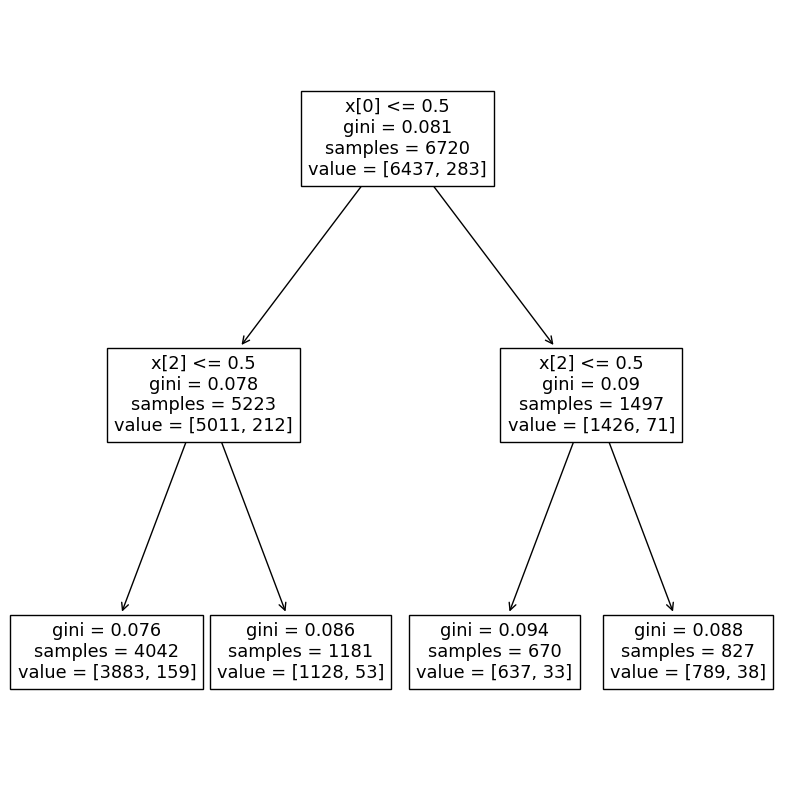

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
skl.plot_tree(teste, ax=ax)
plt.show()